In [1]:
'''Testing most complex layout-31 August'''

!pip install ultralytics -q

In [2]:
!rm -rf *
!mkdir /kaggle/working/ModifiedGroundTruth
!mkdir /kaggle/working/datasets
!mkdir /kaggle/working/datasets/badlad
!mkdir /kaggle/working/datasets/badlad/labels
!mkdir /kaggle/working/datasets/badlad/labels/train
!mkdir /kaggle/working/datasets/badlad/images
!mkdir /kaggle/working/datasets/badlad/images/train
!mkdir /kaggle/working/datasets/badlad/images/test
# !ln -s /kaggle/input/dlsprint2/badlad/images /kaggle/working/datasets/badlad/images
# !ln -s /kaggle/input/dlsprint2/badlad/labels/yolov8_format/train /kaggle/working/datasets/badlad/labels

In [3]:
import os

input_path = "/kaggle/input/dlsprint2/badlad/labels/yolov8_format/train/"  # Replace with the path to your annotation files
output_path = "/kaggle/working/ModifiedGroundTruth/"  # Replace with the desired output path

# Loop through each annotation file
for file_name in os.listdir(input_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(input_path, file_name), "r") as f:
            lines = f.readlines()
        
        modified_lines = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) > 0:
                # Change class labels accordingly
                if parts[0] == "1":
                    parts[0] = "0"
                elif parts[0] == "2":
                    parts[0] = "1"
                elif parts[0] == "3":
                    parts[0] = "2"
                modified_line = " ".join(parts)
                modified_lines.append(modified_line)
        
        # Write modified lines to the output annotation file
        output_file_path = os.path.join(output_path, file_name)
        with open(output_file_path, "w") as f:
            for line in modified_lines:
                f.write(line + "\n")

print("Annotations modified and saved to output folder.")

Annotations modified and saved to output folder.


In [4]:
import os

directory_path = "/kaggle/working/ModifiedGroundTruth/"  # Replace with the directory path you want to count .txt files in

# Get a list of all files in the directory
files = os.listdir(directory_path)

# Count the number of .txt files
txt_file_count = sum(1 for file in files if file.endswith(".txt"))

print(f"Number of .txt files in the directory: {txt_file_count}")

Number of .txt files in the directory: 20365


In [5]:
file_path = "/kaggle/working/ModifiedGroundTruth/0003bdf1-2486-4408-96dc-140f45010f80.txt"  # Replace with the path to your .txt file

with open(file_path, "r") as file:
    content = file.read()
    print(content)

0 0.649558 0.120062 0.762499 0.123244 0.767205 0.139607 0.612499 0.139607
0 0.581323 0.159607 0.598382 0.119153 0.362499 0.12188 0.364852 0.154153
0 0.356029 0.160971 0.343676 0.115971 0.17897 0.120062 0.177205 0.153698
0 0.120735 0.219153 0.838382 0.22188 0.835441 0.323698 0.724852 0.328244 0.128382 0.333244
0 0.127205 0.335062 0.864264 0.333244 0.852499 0.363698 0.509558 0.380062 0.133088 0.376425
0 0.133088 0.376425 0.819558 0.376425 0.836029 0.416425 0.730146 0.420062 0.283088 0.440062 0.142499 0.43688
0 0.121519 0.443698 0.860342 0.43885 0.858774 0.727335 0.156029 0.743698
0 0.806225 0 0.795245 0.0282436 0.850146 0.0476377 0.845441 0.00400136
0 0.616421 0.043395 0.312107 0.0385468 0.318382 0.0688495 0.683088 0.0700618
0 0.222695 0.0982436 0.221127 0.11885 0.316421 0.119759 0.323088 0.100365
0 0.441519 0.101577 0.446225 0.119153 0.52348 0.119153 0.526617 0.0991527
0 0.671323 0.0997586 0.67446 0.123395 0.746225 0.11885 0.74348 0.0991527
0 0.351911 0.184153 0.615441 0.184153 0.617794

In [6]:
import os
from tqdm import tqdm

def all_files_in_folder_symlink(source_dir, target_dir):
    files = os.listdir(source_dir)

    for file in tqdm(files):
        source_file = os.path.join(source_dir, file)
        target_file = os.path.join(target_dir, file)
        os.symlink(source_file, target_file)

In [7]:
all_files_in_folder_symlink("/kaggle/working/ModifiedGroundTruth","/kaggle/working/datasets/badlad/labels/train")

100%|██████████| 20365/20365 [00:00<00:00, 27128.48it/s]


In [8]:
all_files_in_folder_symlink("/kaggle/input/dlsprint2/badlad/images/train","/kaggle/working/datasets/badlad/images/train")

100%|██████████| 20365/20365 [00:01<00:00, 14612.48it/s]


In [9]:
all_files_in_folder_symlink("/kaggle/input/dlsprint2/badlad/images/test","/kaggle/working/datasets/badlad/images/test")

100%|██████████| 13000/13000 [00:00<00:00, 13577.01it/s]


In [10]:
# !tree -d

In [11]:
!pip install ultralytics -q

In [12]:
# file_content = """
# path: /kaggle/working/datasets/badlad  # dataset root dir
# train: images/train  # train images (relative to 'path') 128 images
# val: images/train  # val images (relative to 'path') 128 images
# test:  images/test

# # Classes
# names:
#   0: paragraph
#   1: text_box
#   2: image
#   3: table


# """

file_content = """
path: /kaggle/working/datasets/badlad  # dataset root dir
train: images/train  # train images (relative to 'path') 128 images
val: images/train  # val images (relative to 'path') 128 images
test:  images/test

# Classes
names:
  0: paragraph
  1: image
  2: table


"""

with open("yolov8.yaml", mode="w") as f:
    f.write(file_content)

In [13]:
import wandb
wandb.init(mode="disabled")

In [14]:
from ultralytics import YOLO
model = YOLO("yolov8l-seg.pt")

model.train(
    data="/kaggle/working/yolov8.yaml",
    epochs=6,
    imgsz=560,
    batch=4,
    seed=3000,
    overlap_mask=False,
    fliplr=0.0,
    close_mosaic=20,
    show_labels=False,
    conf=0.25,
    iou=0.45,
    max_det=1000,
    val=False,
    half=True,
)

100%|██████████| 88.1M/88.1M [00:01<00:00, 67.9MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/kaggle/working/yolov8.yaml, epochs=6, patience=50, batch=4, imgsz=560, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=3000, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=20, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=False, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.45, max_det=1000, half=True, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=False, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None,

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f14f80d4eb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [15]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.203 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8l-seg summary (fused): 295 layers, 45914201 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /kaggle/working/datasets/badlad/labels/train.cache... 20365 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20365/20365 [00:00<?, ?it/s]
train: WARNING ⚠️ /kaggle/working/datasets/badlad/images/train/57e1de63-9bd7-4547-a486-52a1ab87da59.png: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1273/1273 [11:23<00:00,  1.86it/s]
                   all      20365     425041      0.797      0.702      0.756      0.584      0.602       0.54      0.533      0.313
             paragraph      20365     413389      0.864      0.791      0.871      0.606      0.782      0.718      0.785      0.454
                 image      20365      10297      0.815      0.729      0.767   

In [16]:
metrics.box.map    # map50-95(B)

0.5835668677242417

In [17]:
metrics.box.map50  # map50(B)

0.7560239709186772

In [18]:
metrics.box.map75  # map75(B)

0.6314709439067653

In [19]:
metrics.box.maps   # a list contains map50-95(B) of each category

array([    0.60623,     0.63011,     0.51436])

In [20]:
metrics.seg.map    # map50-95(M)

0.3129854765514982

In [21]:
metrics.seg.map50  # map50(M)

0.5326201067813122

In [22]:
metrics.seg.map75  # map75(M)

0.3153250958374122

In [23]:
metrics.seg.maps   # a list contains map50-95(M) of each category

array([    0.45397,     0.47243,    0.012553])

In [24]:
# Load a model
# model = YOLO('yolov8n-seg.pt')  # load an official model
# model = YOLO('/kaggle/input/bestyolodemo/best.pt')  # load a custom model

# Predict with the model
results = model('/kaggle/input/dlsprint2/badlad/images/train/0003bdf1-2486-4408-96dc-140f45010f80.png')  # predict on an image


image 1/1 /kaggle/input/dlsprint2/badlad/images/train/0003bdf1-2486-4408-96dc-140f45010f80.png: 576x448 14 paragraphs, 1 table, 80.9ms
Speed: 2.3ms preprocess, 80.9ms inference, 10.5ms postprocess per image at shape (1, 3, 576, 448)


In [25]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'paragraph', 1: 'image', 2: 'table'}
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
       

In [26]:
from ultralytics import YOLO

# model = YOLO("/kaggle/input/nomanyolo/-kaggle-working-/yolov8m-seg.pt")

In [27]:
results = model.predict(model='/kaggle/working/runs/segment/train/weights/best.pt' ,
             source='/kaggle/input/dlsprint2/badlad/images/train/0003bdf1-2486-4408-96dc-140f45010f80.png')


image 1/1 /kaggle/input/dlsprint2/badlad/images/train/0003bdf1-2486-4408-96dc-140f45010f80.png: 576x448 14 paragraphs, 1 table, 24.5ms
Speed: 2.4ms preprocess, 24.5ms inference, 2.6ms postprocess per image at shape (1, 3, 576, 448)


In [28]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'paragraph', 1: 'image', 2: 'table'}
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
       

In [29]:
# plt.imshow(res_plotted)


0: 576x384 17 paragraphs, 5 images, 84.5ms
Speed: 2.1ms preprocess, 84.5ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 384)


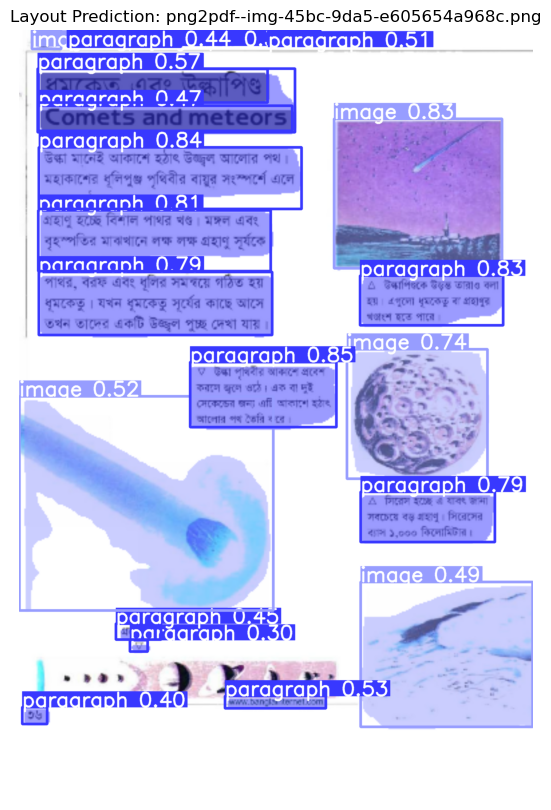


0: 576x384 71 paragraphs, 3 images, 1 table, 23.0ms
Speed: 2.3ms preprocess, 23.0ms inference, 2.9ms postprocess per image at shape (1, 3, 576, 384)


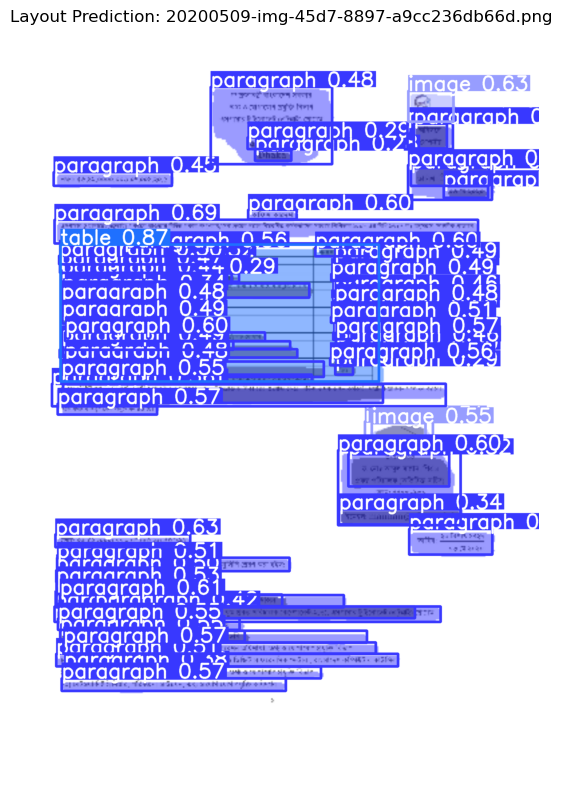


0: 576x384 27 paragraphs, 23.0ms
Speed: 2.6ms preprocess, 23.0ms inference, 2.6ms postprocess per image at shape (1, 3, 576, 384)


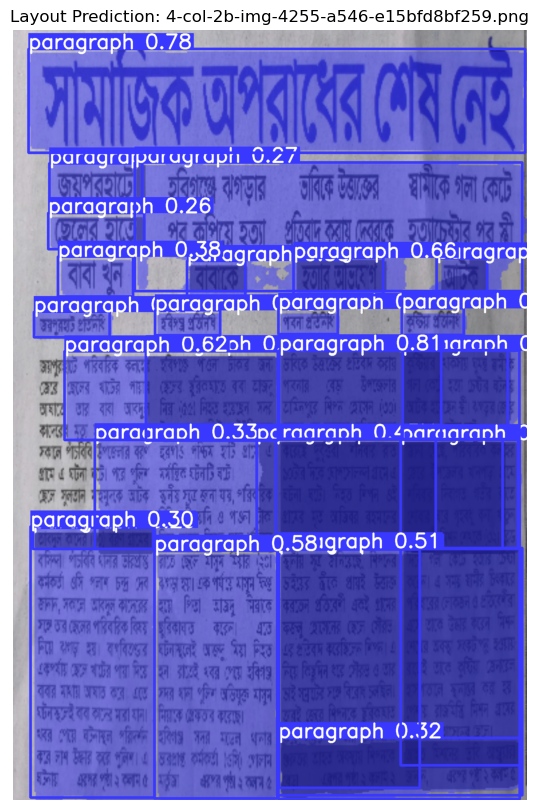


0: 576x384 17 paragraphs, 1 image, 1 table, 23.1ms
Speed: 2.1ms preprocess, 23.1ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 384)


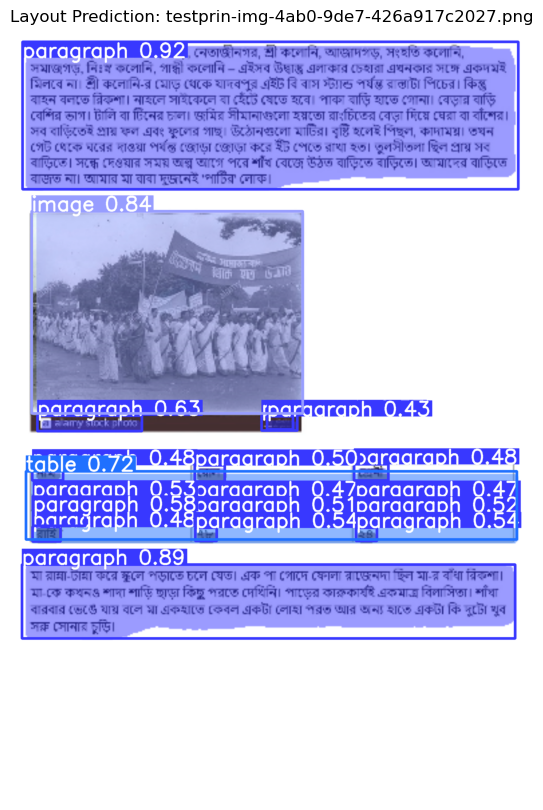


0: 576x384 4 paragraphs, 1 image, 23.1ms
Speed: 2.9ms preprocess, 23.1ms inference, 2.3ms postprocess per image at shape (1, 3, 576, 384)


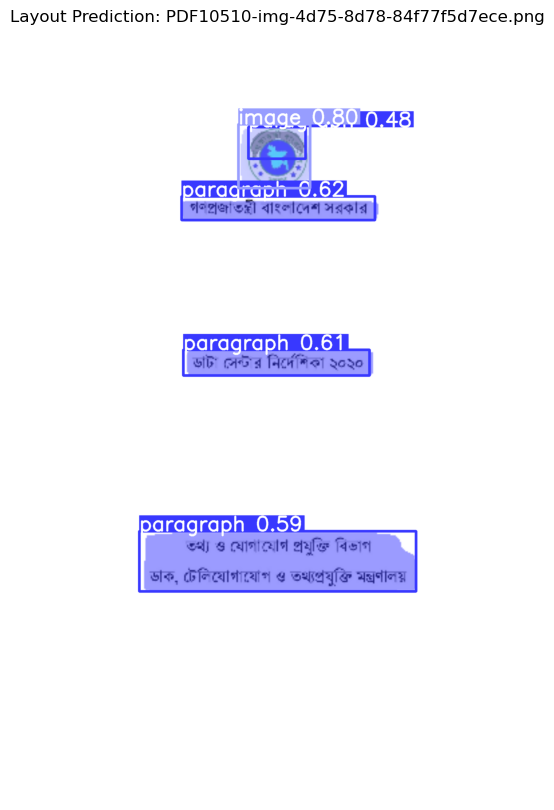


0: 576x384 22 paragraphs, 4 images, 23.0ms
Speed: 2.1ms preprocess, 23.0ms inference, 2.6ms postprocess per image at shape (1, 3, 576, 384)


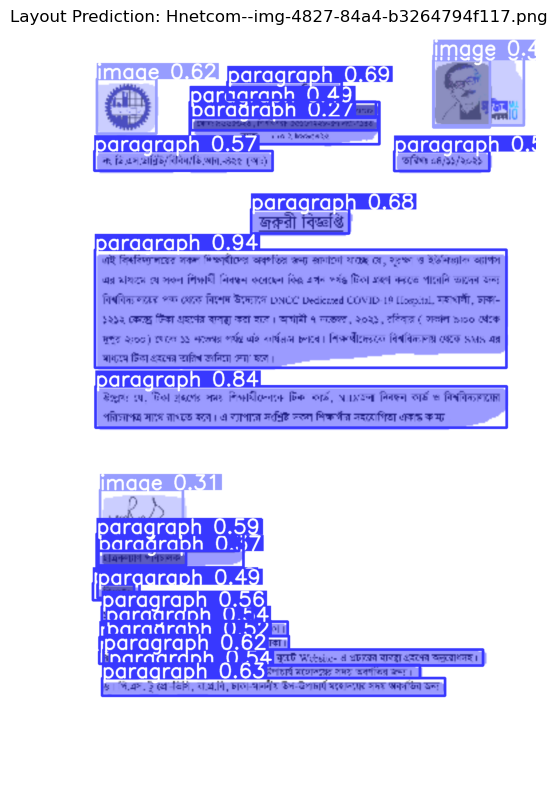


0: 576x384 8 paragraphs, 1 image, 23.0ms
Speed: 2.7ms preprocess, 23.0ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 384)


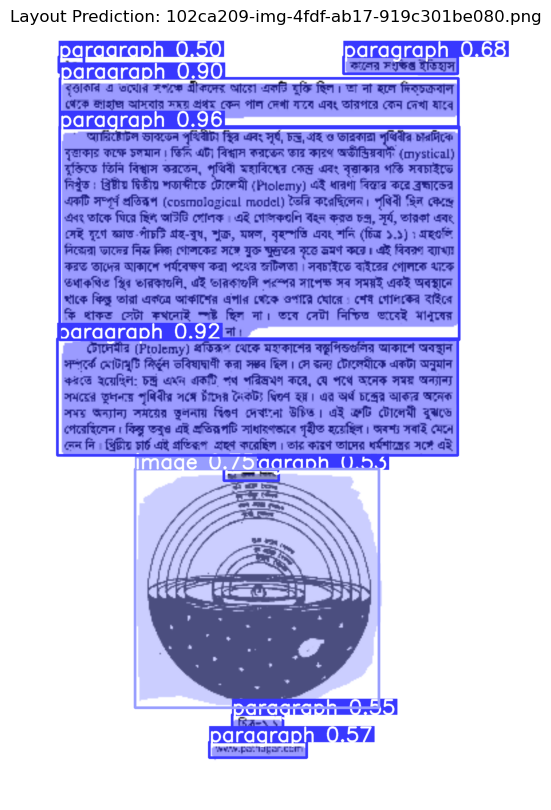


0: 576x384 9 paragraphs, 1 image, 23.1ms
Speed: 2.3ms preprocess, 23.1ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 384)


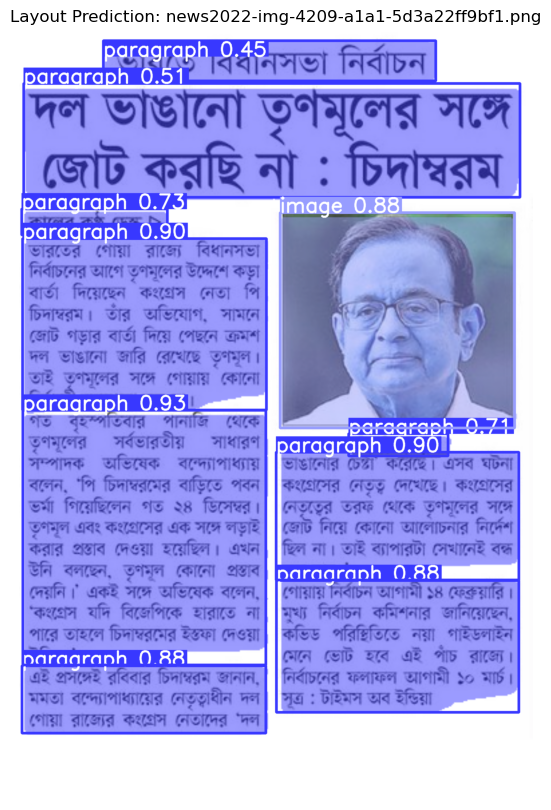


0: 576x384 11 paragraphs, 1 image, 23.0ms
Speed: 2.7ms preprocess, 23.0ms inference, 2.3ms postprocess per image at shape (1, 3, 576, 384)


In [ ]:
import cv2 
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# Load the model
model = YOLO("/kaggle/working/runs/segment/train/weights/best.pt")

# Path to the folder containing images
folder_path = "/kaggle/input/resized-imagetest/Resized_image"

# Get a list of image file paths in the folder (matching both png and jpg)
image_paths = list(Path(folder_path).glob("*.png")) + list(Path(folder_path).glob("*.jpg"))

# Loop through the images and visualize predictions
for image_path in image_paths:
    img = cv2.imread(str(image_path))
    results = model(img)
    res_plotted = results[0].plot()
    
    # Display the image with predicted layout
    plt.figure(figsize=(10, 10))
    plt.imshow(res_plotted)
    plt.axis('off')
    plt.title(f"Layout Prediction: {image_path.name}")
    plt.show()